### Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from skimage import io
import sys
import seaborn as sns
from scipy import spatial

In [2]:
sys.path.insert(1, "/Users/k1801626/OneDrive - King's College London/git/AFT-Alignment_by_Fourier_Transform/Python_implementation/")
import AFT_tools as AFT       

### Import data (csv tracks and images)

In [72]:
input_folder = "/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/"

In [79]:
spots_list = glob.glob(input_folder+'*Spots.csv')

print(*spots_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/merged_Spots.csv


In [74]:
tracks_list = glob.glob(input_folder+'*Tracks.csv')

print(*tracks_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/merged_Tracks.csv


In [75]:
image_list = glob.glob(input_folder+'ctrl/clahe*.tif')

print(*image_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 6.tif
/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 12.tif


### Parameters

In [76]:
single_frame = False

In [132]:
#### required AFT parameters ####
window_size = 100
overlap = 0.6
neighborhood_radius = 5

### Load data

In [77]:
file_list = 0

In [80]:
df_spots = pd.read_csv(spots_list[file_list])
df_spots.head()

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
0,ID2560,2560,1,113788.0,446.481612,463.926373,0.0,26.0,26,190.336445,...,1850.608931,0.417613,0.884730,5.485520,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
1,ID2435,2435,1,64912.0,186.902997,251.383041,0.0,1.0,1,143.727227,...,1103.639245,0.669551,0.961309,4.332246,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
2,ID2563,2563,1,111268.0,432.193334,454.720643,0.0,27.0,27,188.187463,...,1845.354851,0.410564,0.845194,5.532409,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
3,ID2437,2437,1,71143.0,230.466989,274.844695,0.0,4.0,4,150.484286,...,1161.466995,0.662717,0.959538,4.354525,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
4,ID2565,2565,1,123560.0,441.649200,460.855612,0.0,28.0,28,198.340124,...,1885.321437,0.436928,0.854008,5.362902,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1


In [81]:
df_tracks = pd.read_csv(tracks_list[file_list])
df_tracks.head()

,LABEL,TRACK_INDEX,TRACK_ID,DIVISION_TIME_MEAN,DIVISION_TIME_STD,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,...,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
0,Track_1,1,1,NaN,NaN,76,0,0,0,0,...,0.651187,10.556033,0.651187,1.235458,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
1,Track_2,2,2,NaN,NaN,55,0,0,0,0,...,0.013550,0.361223,0.013550,1.681933,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_2
2,Track_3,3,3,NaN,NaN,76,0,0,0,0,...,0.149645,1.959934,0.149645,1.803235,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_3
3,Track_4,4,4,NaN,NaN,76,0,0,0,0,...,0.044778,0.713082,0.044778,1.874086,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_4
4,Track_8,8,8,NaN,NaN,29,0,0,0,0,...,0.140809,2.646769,0.140809,1.866365,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_8


In [112]:
movie_list = df_spots.File_name.unique()
print(*movie_list, sep="\n")

siCCT8_si5_R1_Position_26
siCCT8_si5_R2_Position_27
siCCT8_si8_R1_Position_31
siCCT8_si8_R2_Position_33
siCTRL_R1_Position_6
siCTRL_R2_Position_12


In [114]:
position_list = []
for movie in range(len(movie_list)):
    position_list = np.append(position_list, movie_list[movie].split("_")[-1])
print(*position_list, sep="\n")

26
27
31
33
6
12


### Load images (for current file)

In [115]:
im_list_current = []
spots_list_current = []
for im_file in range(len(image_list)):
    temp_im_file = image_list[im_file].split("/")[-1]
    for position in range(len(position_list)):
        temp_position = position_list[position]
        if str(temp_position) in temp_im_file:
            im_list_current = np.append(im_list_current, image_list[im_file])
            spots_list_current = np.append(spots_list_current, movie_list[position])
print(*im_list_current, sep="\n")   
print(*spots_list_current, sep="\n")   

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 6.tif
/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 12.tif
siCTRL_R1_Position_6
siCTRL_R2_Position_12


In [134]:
spots = 0 # in range(len(spots_list_current)):

# load current image
im = io.imread(im_list_current[spots])
if single_frame == True:
    im = im[0,]

# run AFT on all (relevant) frames
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(im, window_size, overlap, save_path = input_folder+'output_data/',
                                                             plot_overlay=False, plot_angles=False, 
                                                             plot_eccentricity=False,
                                                             save_figures=False)

In [137]:
AFT_coords = np.empty(shape=(len(x),2))
AFT_coords[:,0] = x
AFT_coords[:,1] = y

In [198]:
# this needs to go in same for loop as before (spots)
df_subset = df_spots.loc[df_spots.File_name == spots_list_current[spots]]

In [199]:
# this needs to go in same for loop as before (spots) + loop (tracks)
trackID = 3 # in range(len(df_subset.TRACK_ID.unique()))

df_track = df_subset.loc[df_subset.TRACK_ID == trackID]
df_track = df_track.sort_values(by='FRAME')
df_track = df_track.reset_index(drop=True)

In [200]:
AFT_angle = []
track_angle = []
current_time_point = []

for time_point in range(len(df_track)-1):
    
    track_current = [df_track.loc[time_point, 'POSITION_X'], df_track.loc[time_point, 'POSITION_Y']]
    track_next = [df_track.loc[time_point+1, 'POSITION_X'], df_track.loc[time_point+1, 'POSITION_Y']]
    
    d_closest,idx_closest = spatial.KDTree(AFT_coords).query(track_current)
    AFT_angle = np.append(AFT_angle, np.ravel(im_theta[time_point])[idx_closest])
    
    track_length = [track_next[0]-track_current[0], track_next[1]-track_current[1]]
    track_norm = np.sqrt(track_length[0] ** 2 + track_length[1] ** 2)
    track_direction = [track_length[0]/track_norm, track_length[1]/track_norm]
    track_angle = np.append(track_angle, np.arctan2(track_direction[1], track_direction[0]))

    current_time_point = np.append(current_time_point, time_point)

AFT_track_angle = AFT_angle-track_angle
AFT_track_angle_cos2 = np.cos(AFT_track_angle) ** 2

In [201]:
df_out = pd.DataFrame(columns = ['FRAME','track_angle','AFT_angle','AFT_track_angle','AFT_track_angle_cos2',
                                'track_angle_u', 'track_angle_v','AFT_angle_u','AFT_angle_v'])

df_out.FRAME = current_time_point
df_out.track_angle = track_angle
df_out.AFT_angle = AFT_angle
df_out.AFT_track_angle = AFT_track_angle
df_out.AFT_track_angle_cos2 = AFT_track_angle_cos2

df_out.track_angle_u = np.cos(track_angle)
df_out.track_angle_v = np.sin(track_angle)
df_out.AFT_angle_u = np.cos(AFT_angle)
df_out.AFT_angle_v = np.sin(AFT_angle)

In [202]:
df_out_merge = pd.merge(df_track, df_out, on='FRAME', how='outer')

In [210]:
# to do: 
# check single_frame == True
# decide where to plot
# set up loops
# decide what to save in df_tracks
# check track vectors on current track (3)

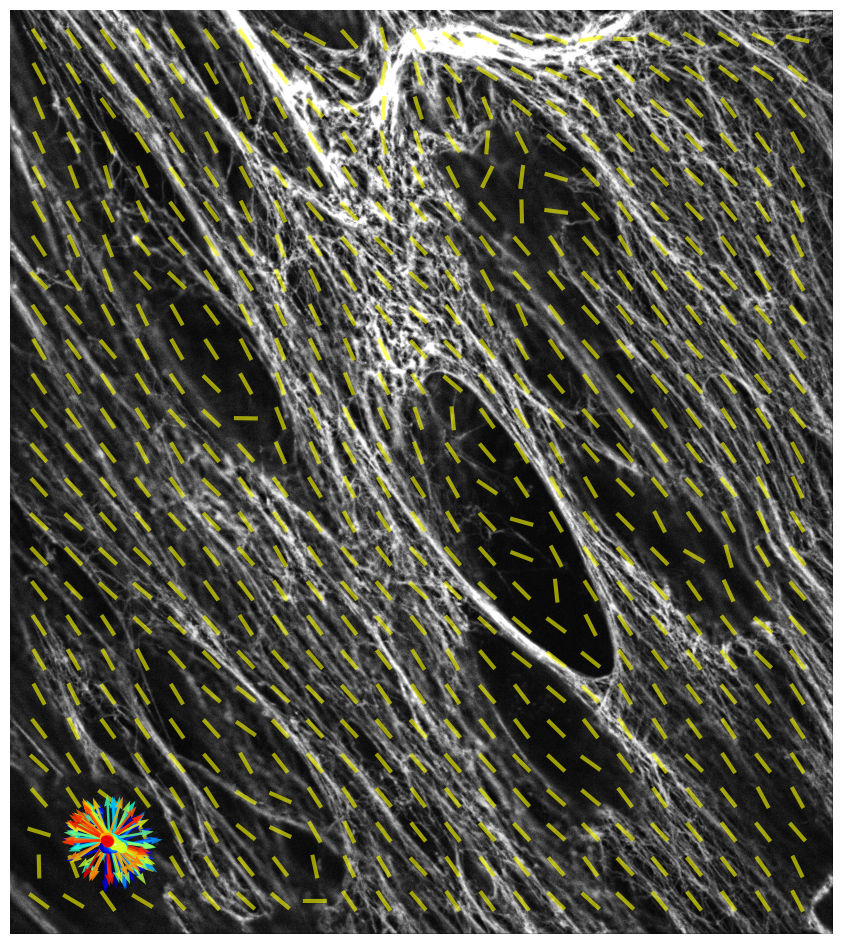

In [238]:
plt.figure(figsize=(18,12))

plt.imshow(im[0,], cmap='gray')
plt.quiver(x,y,u[0],v[0], color='yellow', pivot='mid', scale_units='xy', scale=overlap, headaxislength=0, headlength=0, width=0.005, alpha=0.6)

cmap = plt.get_cmap('jet')
for time_point in range(len(df_track)-1):
    plt.plot(df_track.loc[time_point:time_point+1,'POSITION_X'], df_track.loc[time_point:time_point+1,'POSITION_Y'], color='w')
    plt.plot(df_track.loc[time_point,'POSITION_X'], df_track.loc[time_point,'POSITION_Y'], marker='o', color=cmap(time_point*2))
    plt.quiver(df_out_merge.loc[time_point,'POSITION_X'],df_out_merge.loc[time_point,'POSITION_Y'],
               df_out_merge.loc[time_point,'track_angle_u'], df_out_merge.loc[time_point,'track_angle_v'], 
               color=cmap(time_point*2), angles='xy', width=0.003, alpha=0.8)

plt.axis('off')
plt.show()

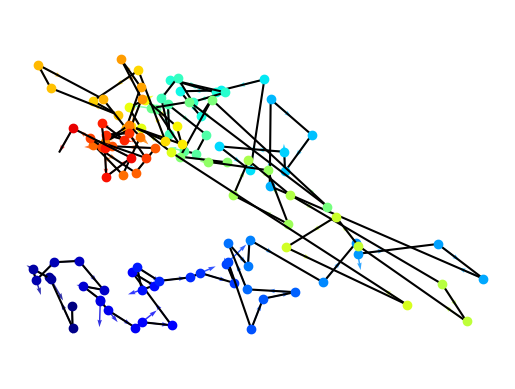

In [232]:
cmap = plt.get_cmap('jet')
for time_point in range(len(df_track)-1):
    plt.plot(df_track.loc[time_point:time_point+1,'POSITION_X'], df_track.loc[time_point:time_point+1,'POSITION_Y'], color='k')
    plt.plot(df_track.loc[time_point,'POSITION_X'], df_track.loc[time_point,'POSITION_Y'], marker='o', color=cmap(time_point*2))
    plt.quiver(df_out_merge.loc[time_point,'POSITION_X'],df_out_merge.loc[time_point,'POSITION_Y'],
               df_out_merge.loc[time_point,'track_angle_u'], df_out_merge.loc[time_point,'track_angle_v'], 
               color=cmap(time_point*2), angles='xy', width=0.003, alpha=0.8)

plt.axis('equal')
plt.axis('off')

plt.gca().invert_yaxis()
plt.show()

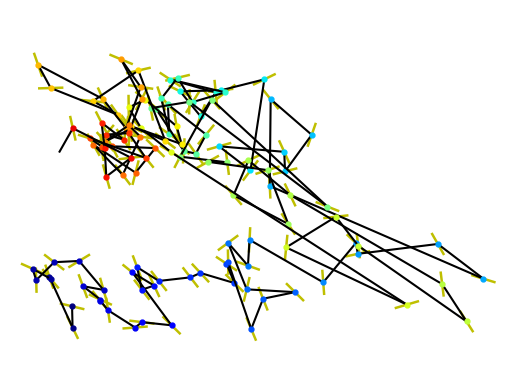

In [237]:
cmap = plt.get_cmap('jet')
for time_point in range(len(df_track)-1):
    plt.plot(df_track.loc[time_point:time_point+1,'POSITION_X'], df_track.loc[time_point:time_point+1,'POSITION_Y'], color='k')
    plt.plot(df_track.loc[time_point,'POSITION_X'], df_track.loc[time_point,'POSITION_Y'], marker='.', color=cmap(time_point*2), markersize = 7)

plt.quiver(df_out_merge.POSITION_X,df_out_merge.POSITION_Y,df_out_merge.AFT_angle_u, df_out_merge.AFT_angle_v, color='y', 
           pivot='mid', headaxislength=0, headlength=0, width=0.005)

plt.axis('equal')
plt.axis('off')

plt.gca().invert_yaxis()
plt.show()